In [1]:
import EOSutils as meos

import numpy as np
import matplotlib.pyplot as plt

import matplotlib.style
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.cm as cmx
from mpl_toolkits.axes_grid1 import make_axes_locatable

mpl.style.use('classic')

from astropy.table import Table
from astropy import units as u
from astropy.constants import G

from decimal import Decimal

import mesa_helper as mh
import os
import shutil
import copy
import time
import warnings

from scipy import ndimage, interpolate, optimize
from scipy.integrate import quad
import pickle

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# CEPAM format: log10P[erg/cm3] log10T[K] log10rho[g/cm3] log10S[erg/g/K]
# grid coords are (P, T), which is already true for cd21
# AQUA needs to be re-based from (rho, T) to (P, T)

In [3]:
# CD21
cd21_H = meos.CMStable("./2021_chabrier+_tables/TABLE_H_TP_effective",units='cgs')
cd21_He = meos.CMStable("./2021_chabrier+_tables/TABLE_HE_TP_v1",units='cgs')
cd21_Y0275 = meos.CMStable("./2021_chabrier+_tables/TABLEEOS_2021_TP_Y0275_v1",units='cgs')

# AQUA
infile = open('./my_Ztables/blended_h2o.pkl','rb')
aqua = pickle.load(infile)
infile.close()

aqua.X = 0
aqua.Y = 0
aqua.atomic_number = aqua.X + 2*(1.-aqua.X)
aqua.mass_number = aqua.X + 4*(1.-aqua.X)

aquaPT = meos.interpolated_PTtable(rhoTtable=aqua)

In [4]:
profiles = meos.load_sample_planet_profiles(Minit=np.array((1.09,7.59,20.0)), Rinit=2.0, Zinit=0.025, comps=['uniform','inert_core'], Sinit=np.array((9.0,11.0)), alphas=2.0, ages=np.array((1.e6,1.e10)))


/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:1338: UserWarning: The following kwargs were not used by contour: 'shading'
  cs = axes[i,j].contourf(xs[i*nCol + j], ys[i*nCol + j], zs[i*nCol + j], shading='nearest', cmap=cmap[i*nCol + j], levels=np.linspace(zlims[i*nCol+j][0],zlims[i*nCol+j][1],levels[i*nCol+j]))


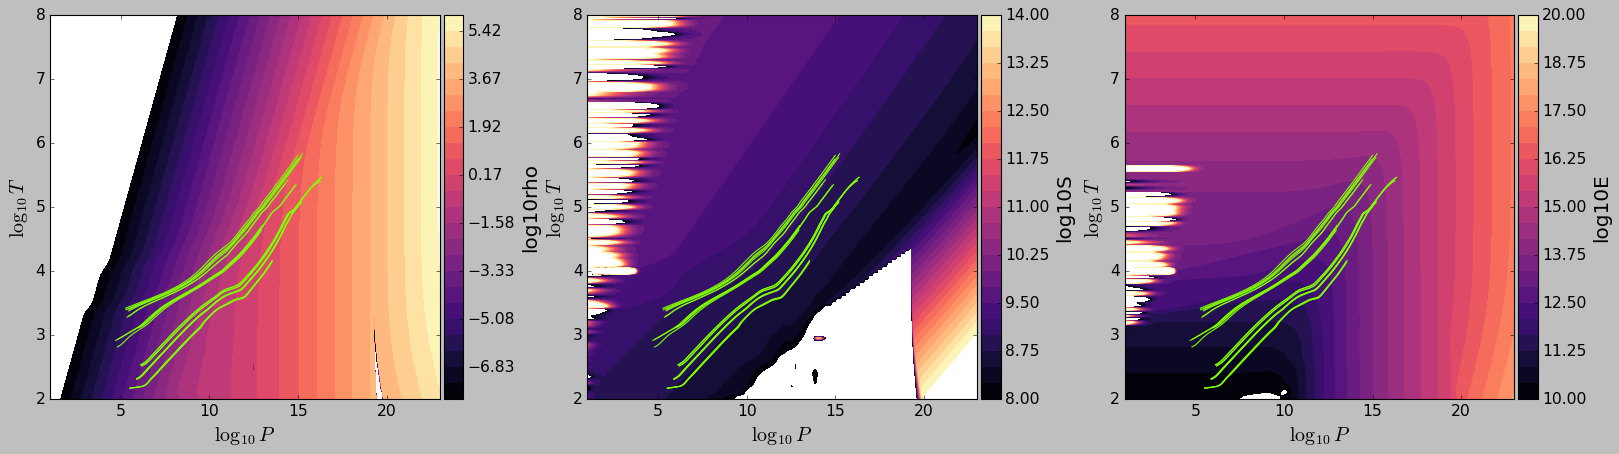

In [5]:
meos.contourf_sublots_with_colorbars(nRow=1, nCol=3, 
                                xs=cd21_H.log10Pgrid,
                                ys=cd21_H.log10Tgrid,
                                zs=[cd21_H.log10rhogrid, cd21_H.log10Sgrid, cd21_H.log10Egrid],
                                xlims=(1,23),
                                ylims=(2,8),
                                zlims=[(-8,6),(8,14),(10,20)],
                                levels=25,
                                xlabels=r'$\log_{10}P$',
                                ylabels=r'$\log_{10}T$',
                                zlabels=['log10rho','log10S','log10E'],
                                cmap='magma', vlines=None, hlines=None, otherlines_x=[prof['logP'] for prof in profiles], otherlines_y=[prof['logT'] for prof in profiles], 
                                species='H', plot_interpolation_lines=False, savename=None)

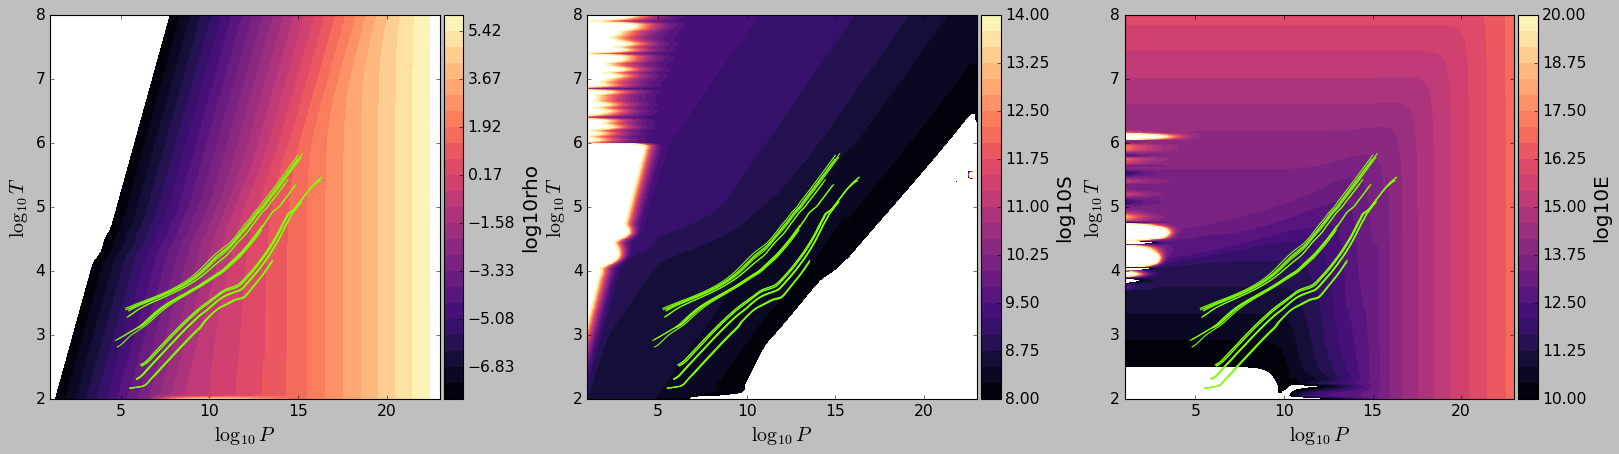

In [6]:
meos.contourf_sublots_with_colorbars(nRow=1, nCol=3, 
                                xs=cd21_He.log10Pgrid,
                                ys=cd21_He.log10Tgrid,
                                zs=[cd21_He.log10rhogrid, cd21_He.log10Sgrid, cd21_He.log10Egrid],
                                xlims=(1,23),
                                ylims=(2,8),
                                zlims=[(-8,6),(8,14),(10,20)],
                                levels=25,
                                xlabels=r'$\log_{10}P$',
                                ylabels=r'$\log_{10}T$',
                                zlabels=['log10rho','log10S','log10E'],
                                cmap='magma', vlines=None, hlines=None, otherlines_x=[prof['logP'] for prof in profiles], otherlines_y=[prof['logT'] for prof in profiles], 
                                species='H', plot_interpolation_lines=False, savename=None)

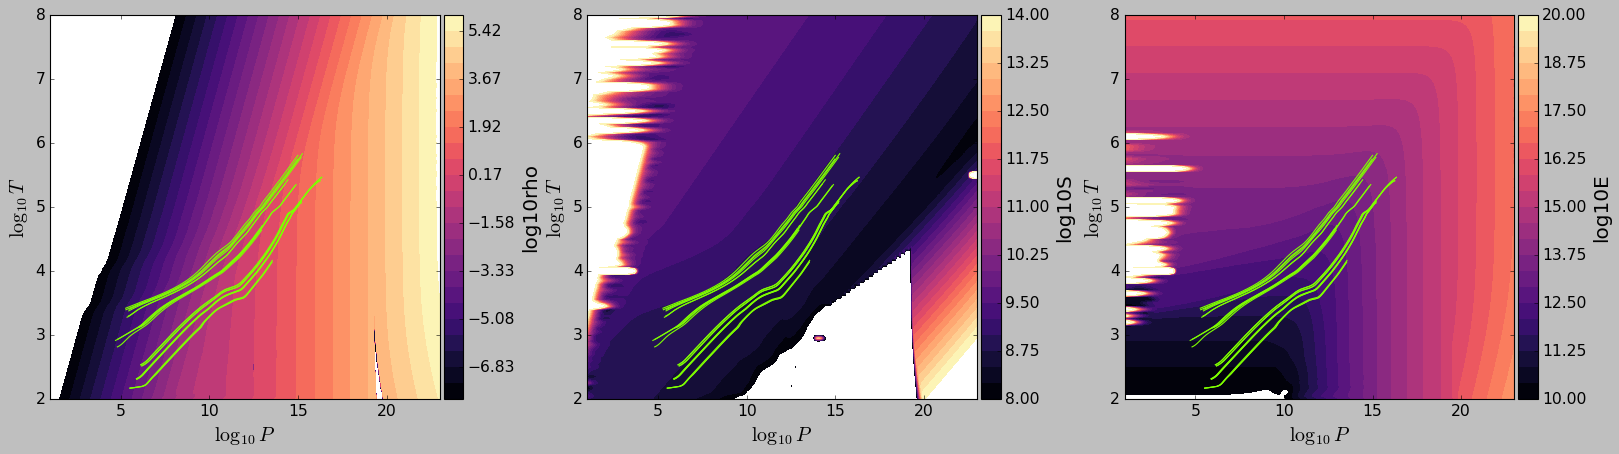

In [7]:
meos.contourf_sublots_with_colorbars(nRow=1, nCol=3, 
                                xs=cd21_Y0275.log10Pgrid,
                                ys=cd21_Y0275.log10Tgrid,
                                zs=[cd21_Y0275.log10rhogrid, cd21_Y0275.log10Sgrid, cd21_Y0275.log10Egrid],
                                xlims=(1,23),
                                ylims=(2,8),
                                zlims=[(-8,6),(8,14),(10,20)],
                                levels=25,
                                xlabels=r'$\log_{10}P$',
                                ylabels=r'$\log_{10}T$',
                                zlabels=['log10rho','log10S','log10E'],
                                cmap='magma', vlines=None, hlines=None, otherlines_x=[prof['logP'] for prof in profiles], otherlines_y=[prof['logT'] for prof in profiles], 
                                species='H', plot_interpolation_lines=False, savename=None)

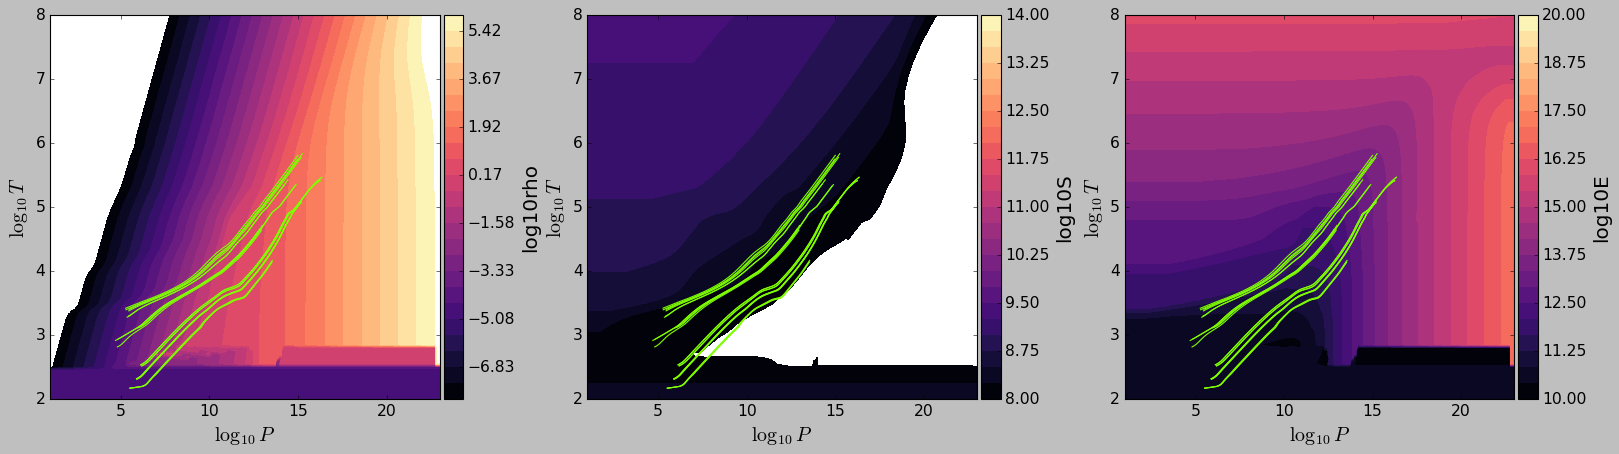

In [8]:
meos.contourf_sublots_with_colorbars(nRow=1, nCol=3, 
                                xs=aquaPT.log10Pgrid,
                                ys=aquaPT.log10Tgrid,
                                zs=[aquaPT.log10rhogrid, aquaPT.log10Sgrid, aquaPT.log10Egrid],
                                xlims=(1,23),
                                ylims=(2,8),
                                zlims=[(-8,6),(8,14),(10,20)],
                                levels=25,
                                xlabels=r'$\log_{10}P$',
                                ylabels=r'$\log_{10}T$',
                                zlabels=['log10rho','log10S','log10E'],
                                cmap='magma', vlines=None, hlines=None, otherlines_x=[prof['logP'] for prof in profiles], otherlines_y=[prof['logT'] for prof in profiles], 
                                species='Z', plot_interpolation_lines=False, savename=None)

In [12]:
print(np.ravel(cd21_H.log10Pgrid)) 
print(np.ravel(cd21_H.log10Tgrid))
print(np.ravel(cd21_H.log10rhogrid)) 
print(np.ravel(cd21_H.log10Sgrid))

[ 1.  1.  1. ... 23. 23. 23.]
[2.   2.05 2.1  ... 7.9  7.95 8.  ]
[-8.51378 -8.61217 -8.66009 ...  6.06058  6.05604  6.05328]
[9.046695 9.716068 9.022774 ... 8.81579  8.82702  8.8372  ]


In [16]:
def save_CEPAM_format(table, filename):
    header = 'log10P[erg/cm3] log10T[K] log10rho[g/cm3] log10S[erg/g/K]'
    
    tosave = np.vstack((np.ravel(table.log10Pgrid),np.ravel(table.log10Tgrid),np.ravel(table.log10rhogrid),np.ravel(table.log10Sgrid))).T

    np.savetxt(filename, tosave, header=header)
    
    return 
    

In [18]:
save_CEPAM_format(cd21_H,'./CD21_effective_H_CEPAM.txt')
save_CEPAM_format(cd21_He,'./CD21_He_CEPAM.txt')
#save_CEPAM_format(cd21_Y0275,'./CD21_Y0275_CEPAM.txt')
save_CEPAM_format(aquaPT, './AQUA_CEPAM.txt')